In [1]:
# A) Importing modules
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

In [16]:
# B) Loading data, preprocessing such as (remove na, remove "PrivacySuppressed", remove Puerto Rico information)
CSVdata = pd.read_csv("Most-Recent-Cohorts-All-Data-Elements.csv", header = 'infer', low_memory = False)
CSVdata = CSVdata[['STABBR','INSTNM','UGDS','PCTPELL','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN',
            'UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_UNKN','MN_EARN_WNE_P10',
            'CIP14ASSOC','CIP14BACHL',
            'CIP15ASSOC','CIP15BACHL',
            'CIP26ASSOC','CIP26BACHL']]

CSVdata = CSVdata.dropna()
CSVdata = CSVdata[CSVdata.MN_EARN_WNE_P10 != 'PrivacySuppressed'] #Remove privacy suppressed data

CSVdata = CSVdata[CSVdata.STABBR != "AS"] #Remove American Samoa
CSVdata = CSVdata[CSVdata.STABBR != "GU"] #Remove Guam
CSVdata = CSVdata[CSVdata.STABBR != "MP"] #Remove Northern Mariana Islands

CSVdata = CSVdata[CSVdata.STABBR != "PR"] #Remove Puerto Rico
CSVdata = CSVdata[CSVdata.STABBR != "VI"] #Remove Virgin Islands
CSVdata = CSVdata[CSVdata.STABBR != "FM"] #Remove Federal States of Micronesia
CSVdata = CSVdata[CSVdata.STABBR != "UM"] #Remove U.S. Minor Outlying Islands 


CSVdata['MN_EARN_WNE_P10'] = CSVdata['MN_EARN_WNE_P10'].astype(float)

In [17]:
# C) Choosing schools that have at least a engineering program or biological program.
#This will remove edge schools like beauty and barber colleges.

#CIP14 Engineering, Apply mathematics and scientific principles to solution of practical problems
#CIP15 Engineering Technologies/Technicians, Apply engineering principles and technical skills 
#CIP26 Biological and Biomedical Sciences, Prepare students for biology and biomedical science

CSVdata['CIP14ASSOC'] = CSVdata['CIP14ASSOC'].astype(float)
CSVdata['CIP14BACHL'] = CSVdata['CIP14BACHL'].astype(float)

CSVdata['CIP15ASSOC'] = CSVdata['CIP15ASSOC'].astype(float)
CSVdata['CIP15BACHL'] = CSVdata['CIP15BACHL'].astype(float)

CSVdata['CIP26ASSOC'] = CSVdata['CIP26ASSOC'].astype(float)
CSVdata['CIP26BACHL'] = CSVdata['CIP26BACHL'].astype(float)

CSVdata = CSVdata[(CSVdata['CIP14ASSOC'] > 0) | (CSVdata['CIP14BACHL'] > 0) |
          (CSVdata['CIP15ASSOC'] > 0) | (CSVdata['CIP15BACHL'] > 0) |
          (CSVdata['CIP26ASSOC'] > 0) | (CSVdata['CIP26BACHL'] > 0) ]



In [18]:
# D) Creating data DataFrame for use

# Reducing the attributes being used
data = CSVdata[['STABBR','INSTNM','UGDS','PCTPELL','UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN',
            'UGDS_AIAN','UGDS_NHPI','UGDS_2MOR','UGDS_UNKN','MN_EARN_WNE_P10']]

# Changing the names of the columns
data.columns = ["State","School","Number_Stud","Pell_Pct","White","Black","Hispanic","Asian","Amer_Ind",
                        "Nat_Haw","Multi","Unknown","Average_Earning"]

data 

,State,School,Number_Stud,Pell_Pct,White,Black,Hispanic,Asian,Amer_Ind,Nat_Haw,Multi,Unknown,Average_Earning
0,AL,Alabama A & M University,4206,0.7356,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0138,35000
1,AL,University of Alabama at Birmingham,11383,0.3460,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0100,46300
3,AL,University of Alabama in Huntsville,5451,0.3072,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0350,50400
4,AL,Alabama State University,4811,0.7347,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0137,29400
5,AL,The University of Alabama,29851,0.2040,0.7825,0.1119,0.0348,0.0106,0.0038,0.0009,0.0261,0.0026,48600
6,AL,Central Alabama Community College,1592,0.5892,0.7255,0.2613,0.0044,0.0025,0.0044,0.0000,0.0000,0.0019,31400
7,AL,Athens State University,2991,0.4088,0.7823,0.1200,0.0191,0.0053,0.0157,0.0010,0.0174,0.0334,41600
8,AL,Auburn University at Montgomery,4304,0.4192,0.5328,0.3376,0.0074,0.0221,0.0044,0.0016,0.0297,0.0246,37700
9,AL,Auburn University,20514,0.1610,0.8507,0.0704,0.0248,0.0227,0.0074,0.0000,0.0000,0.0140,52900
10,AL,Birmingham Southern College,1180,0.1920,0.7983,0.1102,0.0195,0.0517,0.0102,0.0000,0.0051,0.0051,47100


In [19]:
# D.5) Removing outlier values (4 removed)
data = data[data.Number_Stud < 55000]

data

,State,School,Number_Stud,Pell_Pct,White,Black,Hispanic,Asian,Amer_Ind,Nat_Haw,Multi,Unknown,Average_Earning
0,AL,Alabama A & M University,4206,0.7356,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0138,35000
1,AL,University of Alabama at Birmingham,11383,0.3460,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0100,46300
3,AL,University of Alabama in Huntsville,5451,0.3072,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0350,50400
4,AL,Alabama State University,4811,0.7347,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0137,29400
5,AL,The University of Alabama,29851,0.2040,0.7825,0.1119,0.0348,0.0106,0.0038,0.0009,0.0261,0.0026,48600
6,AL,Central Alabama Community College,1592,0.5892,0.7255,0.2613,0.0044,0.0025,0.0044,0.0000,0.0000,0.0019,31400
7,AL,Athens State University,2991,0.4088,0.7823,0.1200,0.0191,0.0053,0.0157,0.0010,0.0174,0.0334,41600
8,AL,Auburn University at Montgomery,4304,0.4192,0.5328,0.3376,0.0074,0.0221,0.0044,0.0016,0.0297,0.0246,37700
9,AL,Auburn University,20514,0.1610,0.8507,0.0704,0.0248,0.0227,0.0074,0.0000,0.0000,0.0140,52900
10,AL,Birmingham Southern College,1180,0.1920,0.7983,0.1102,0.0195,0.0517,0.0102,0.0000,0.0051,0.0051,47100


In [7]:
# E) Calculate the Diversity_Index rating
def diversity_index_calculator (WP,BP,AS,AI,NH,MR,UP):
    '''
    Calculates the diversity index based on percent make up of ethinicities
        Uses the equation: Diversity Index = 1 - Σp^2
    Input: seven percentages
    Output: diversity index rating
    '''
    SumP = WP**2 + BP**2 + AS**2 + AI**2 + NH**2 + MR**2 + UP**2
    
    return 1 - SumP
    

In [60]:
# F) Use linear_regression on multivariate data to calculate coefficients and intercept values
def Regression_DK (state,data):
    '''
    Creates the model for polynomial regression on the data and saves files in png format
    Input: state name, data (X[x1,x2,x3] and Y)
    Output: weights, 
    '''
    X = data[['Students','Pell','Diversity']]
    Y = data['Avg_Inc']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
    #Splitting data into training and testing
    
    X1 = X['Students'] #Splitting X matrix for plotting purposes
    X2 = X['Pell']
    X3 = X['Diversity']
    
    X1_train = X_train['Students']
    X2_train = X_train['Pell']
    X3_train = X_train['Diversity']

    X1_test = X_test['Students']
    X2_test = X_test['Pell']
    X3_test = X_test['Diversity']
    
    
    #######################################Number of undergraduate students
    z1 = np.polyfit(X1_train,Y_train,2) #Polynomial regression
    p1 = np.poly1d(z1) #p1() become f(), where we give p1 x values and it uses the learned model to give y values
    
    xp = np.linspace(0,80000)
    plt.plot(X1, Y, '.', xp, p1(xp), '-') #Plotting regression
    plt.ylim(0,100000)
    
    plt.xlabel('Number of students')
    plt.ylabel('Average Income of New Grads')   

    Model = p1
    
    pred1 = p1(X1_test)
    N = len(pred1)
    pS = np.sum(pred1) / N
    YS = np.sum(Y_test) / N
    
    #Normalized Mean Squared Error
    E = np.sum (  (pred1 - Y_test) **2) / N
    NMSE = E/(pS * YS)
    NMSE = float(format(NMSE*100,'.2f'))
    
    #Correlation
    Correlation = np.corrcoef(pred1,Y_test)[0][1]
    Correlation = float(format(Correlation,'.3f'))

    #Adding text to the plots
    plt.text(35000,95000,s = "NMSE:" + str(NMSE)+"%", horizontalalignment = 'left', verticalalignment = 'top')
    plt.text(35000,90000,s = "Correlation:" + str(Correlation), horizontalalignment = 'left', verticalalignment = 'top')
    plt.text(35000,85000,s = "Model:" + str(Model), horizontalalignment = 'left', verticalalignment = 'top')    

    plt.grid('on')
    plt.savefig("States_Number/"+ str(state)+"_Students.png",bbox_inches = 'tight')
    #Storing figure to be used for website
    plt.show()
    
    
    ######################################Percentage of Pell Recipients
    z2 = np.polyfit(X2,Y,2)     #Polynomial regression
    p2 = np.poly1d(z2) #p1() become f(), where we give p1 x values and it uses the learned model to give y values
    
    xp = np.linspace(0,1)
    plt.plot(X2_train, Y_train, '.', xp, p2(xp), '-') #Plotting regression

    plt.ylim(0,100000)
    plt.xlabel('Percent of Pell Grant Recipients')
    plt.ylabel('Average Income of New Grads')
  
    Model = p2
    
    pred2 = p2(X2_test)
    N = len(pred2)
    pS = np.sum(pred2) /N
    YS = np.sum(Y_test) /N
    
    #Normalized Mean Squared Error
    E = np.sum (  (pred2 - Y_test) **2) / N
    NMSE = E/(pS * YS)
    NMSE = float(format(NMSE*100,'.2f'))
    
    #Correlation
    Correlation = np.corrcoef(pred2,Y_test)[0][1]
    Correlation = float(format(Correlation,'.3f'))
    
    #Adding text to the plots
    plt.text(.37,95000,s = "NMSE:" + str(NMSE)+"%", horizontalalignment = 'left', verticalalignment = 'top')
    plt.text(.37,90000,s = "Correlation:" + str(Correlation), horizontalalignment = 'left', verticalalignment = 'top')
    plt.text(.37,85000,s = "Model:" + str(Model), horizontalalignment = 'left', verticalalignment = 'top') 

    plt.grid('on')
    plt.savefig("States_Pell/"+ str(state)+"_Pell.png",bbox_inches = 'tight')
    plt.show() 
    
    
    
    #################################Diversity Index
    z3 = np.polyfit(X3,Y,2)
    p3 = np.poly1d(z3)
    
    xp = np.linspace(0,1)
    plt.plot(X3_train, Y_train, '.', xp, p3(xp), '-')
    plt.ylim(0,100000)
    #plt.title("Diversity Index vs. Average Income of New Grads")
    plt.xlabel('Diversity Index')
    plt.ylabel('Average Income of New Grads') 

    X3_test = X_test['Diversity']
    Model = p3
    
    pred3 = p3(X3_test)
    N = len(pred3)
    pS = np.sum(pred3) /N
    YS = np.sum(Y_test) /N
    
    #Normalized Mean Squared Error
    E = np.sum (  (pred3 - Y_test) **2) / N
    NMSE = E/(pS * YS)
    NMSE = float(format(NMSE*100,'.2f')) 
    
    #Correlation
    Correlation = np.corrcoef(pred3,Y_test)[0][1] 
    Correlation = float(format(Correlation,'.3f'))
    
    #Adding text to the plots
    plt.text(.37,95000,s = "NMSE:" + str(NMSE)+"%", horizontalalignment = 'left', verticalalignment = 'top')
    plt.text(.37,90000,s = "Correlation:" + str(Correlation), horizontalalignment = 'left', verticalalignment = 'top')
    plt.text(.37,85000,s = "Model:" + str(Model), horizontalalignment = 'left', verticalalignment = 'top')

    #Adding text to the plots
    plt.grid('on')
    plt.savefig("States_Diversity/"+ str(state)+"_Diversity.png",bbox_inches = 'tight')
    #Storing figure to be used for website
    plt.show()  
    
    
    #Original training model. Idea was scrapped because of time and unknown error evaluation.
    #   Once again this idea was scrapped in favor of everything provided however it still works
    #   and returns a regression model that is stored in our MySQL database.
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)

    Xpred = regr.predict(X_test)
    Y_test = p.to_numeric(Y_test)

    print("Mean squared error:",np.mean((Xpred - (Y_test)) ** 2))
    print('Variance score:',regr.score(X_test, Y_test))  
    
    return regr
    

State: AL


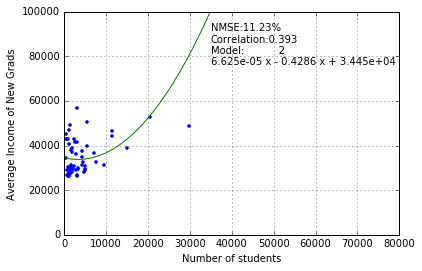

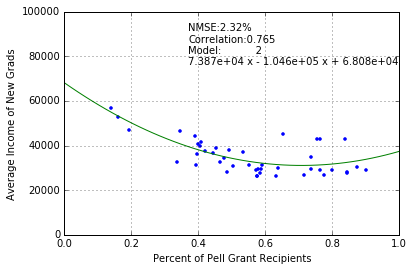

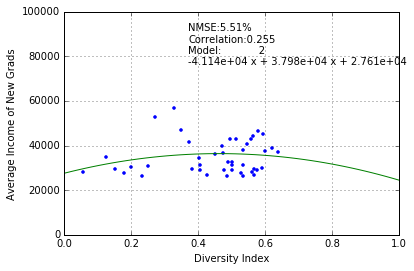


State: AR


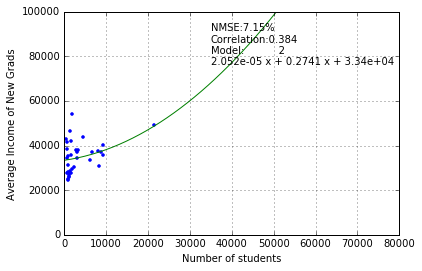

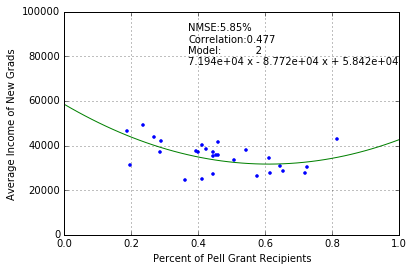

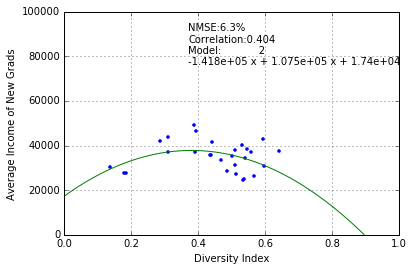


State: AZ


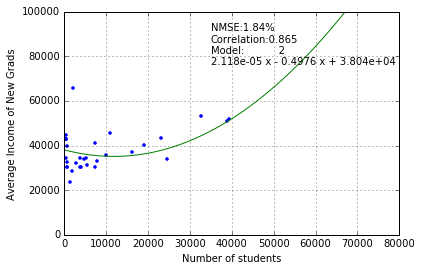

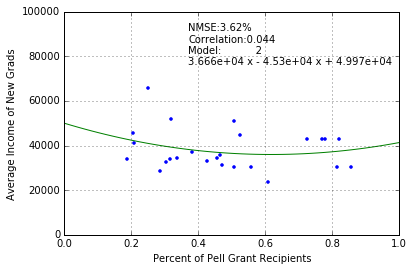

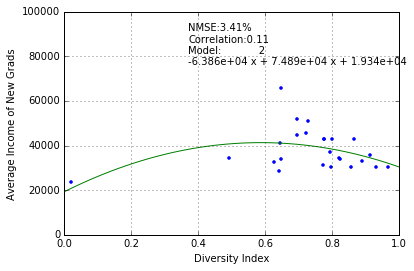


State: CA


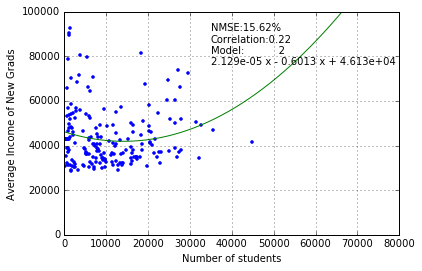

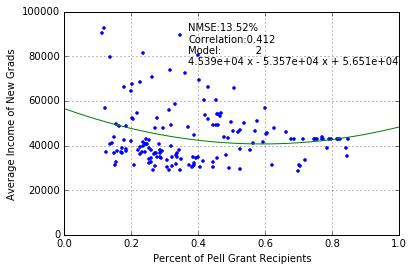

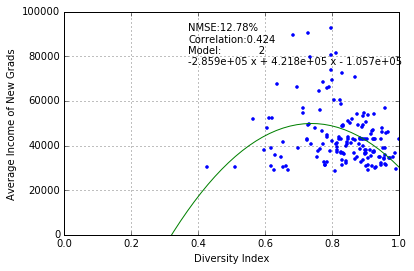


State: CO


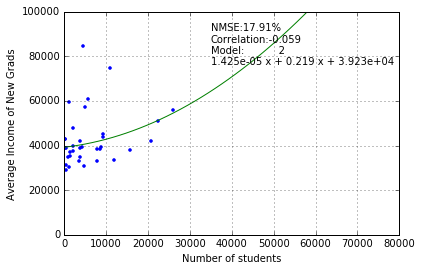

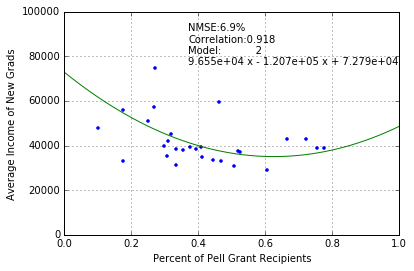

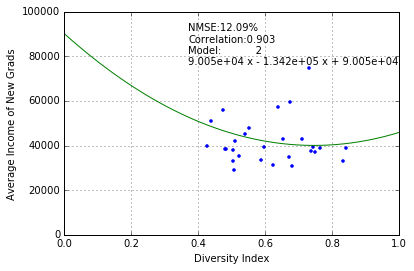


State: CT


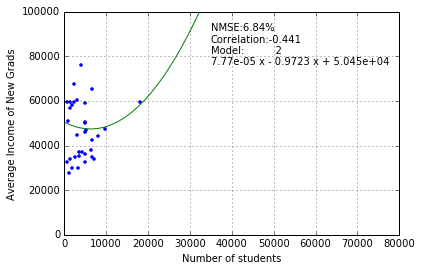

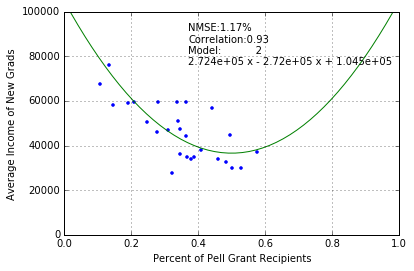

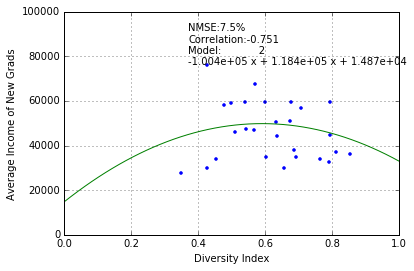


State: FL


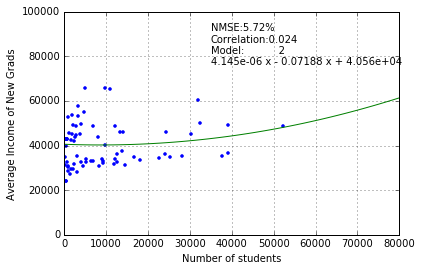

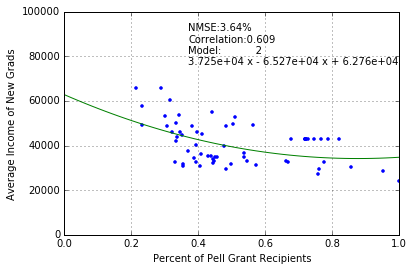

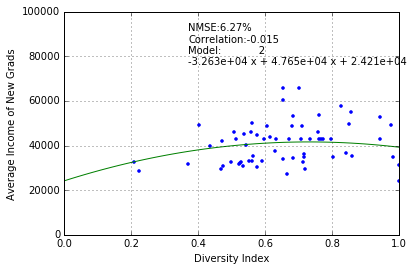


State: GA


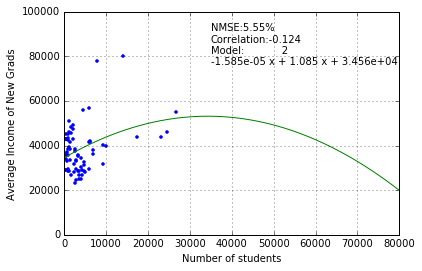

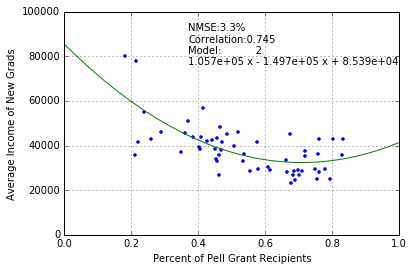

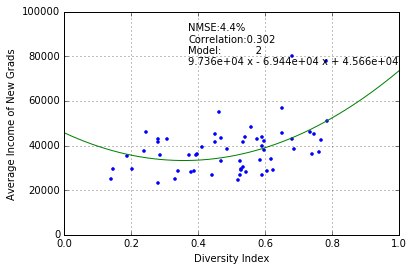


State: IA


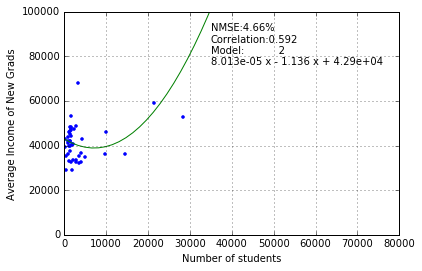

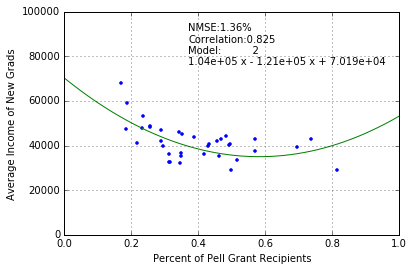

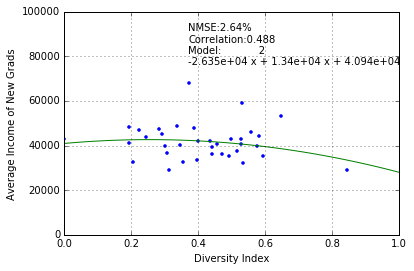


State: IL


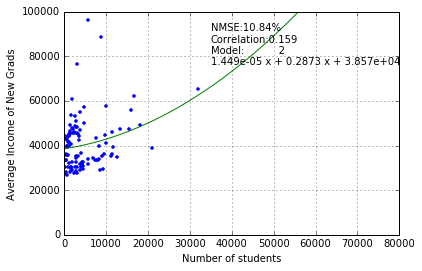

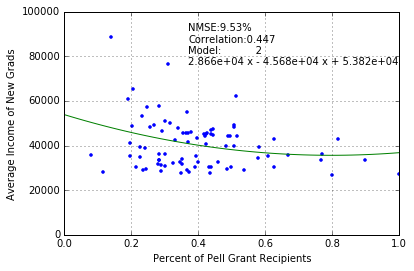

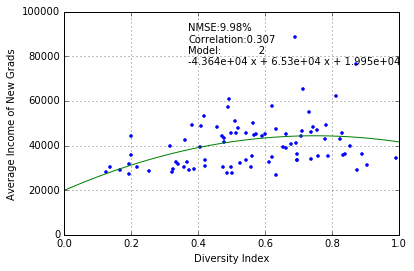


State: IN


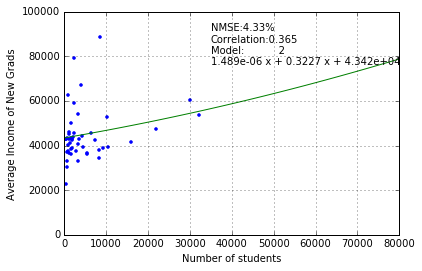

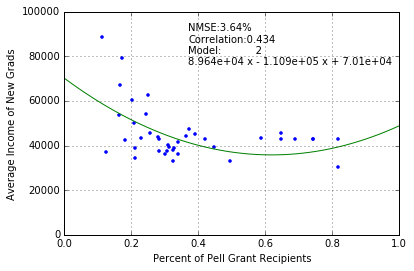

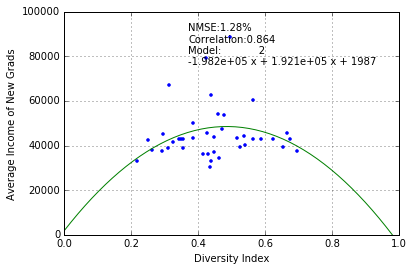


State: KS


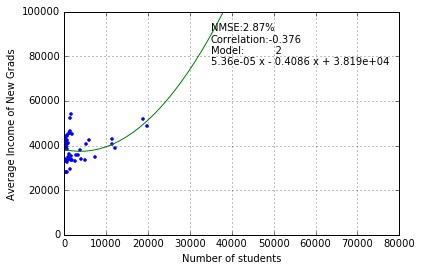

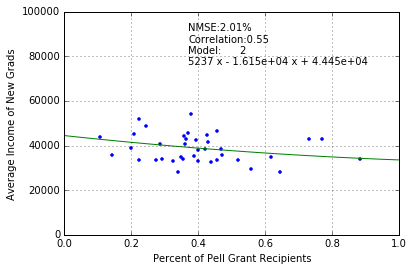

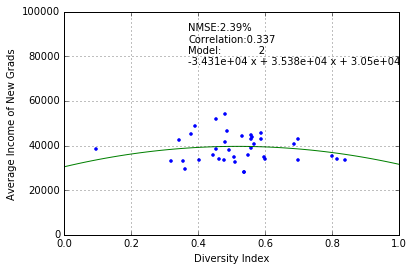


State: KY


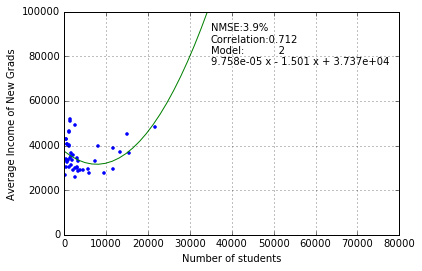

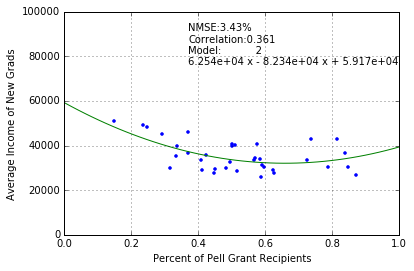

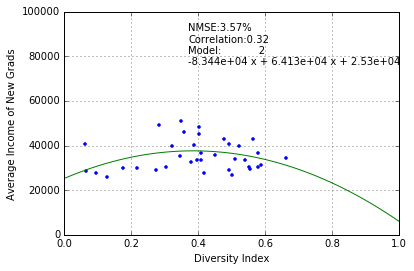


State: LA


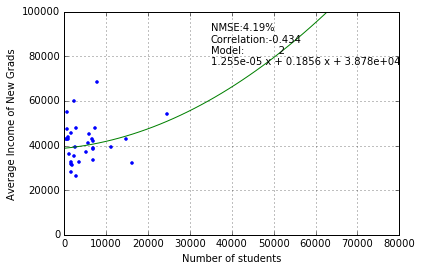

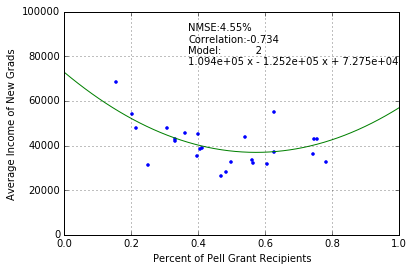

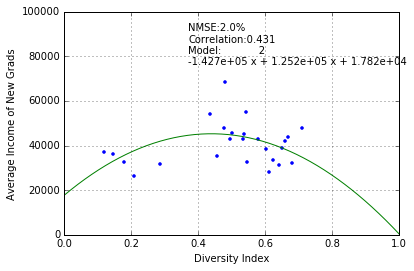


State: MA


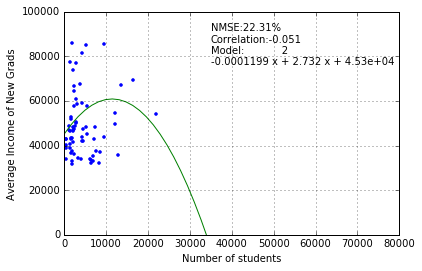

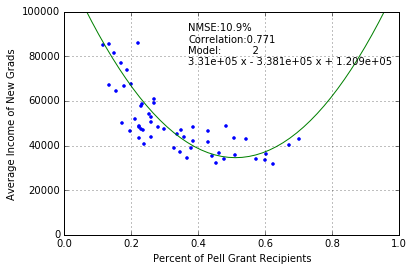

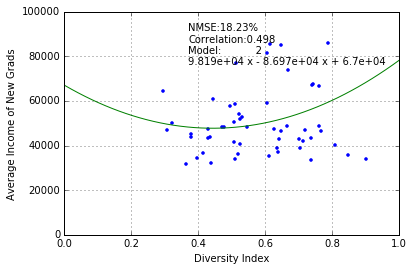


State: MD


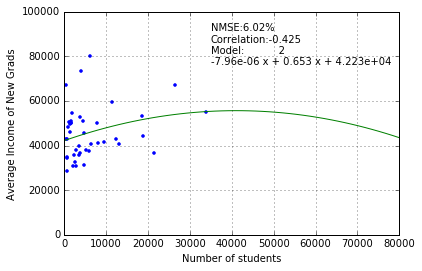

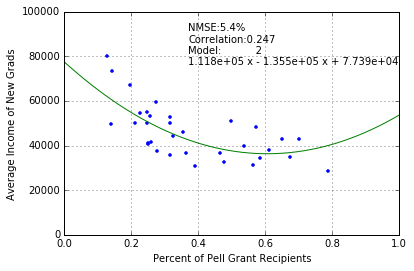

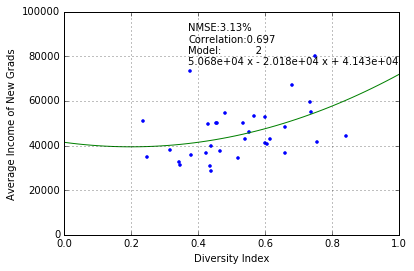


State: ME


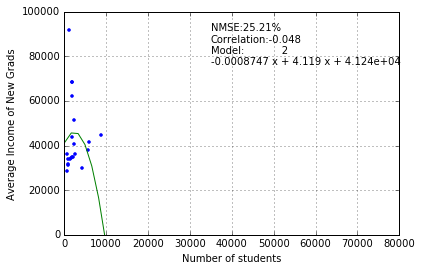

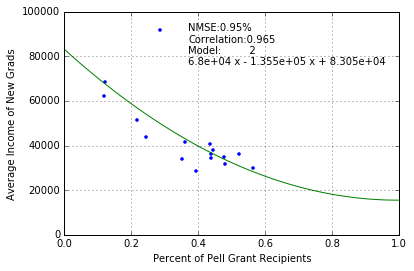

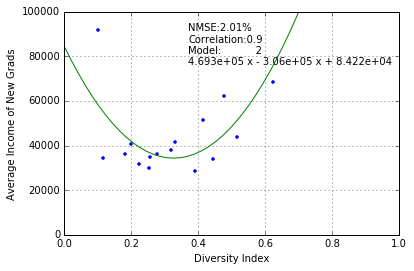


State: MI


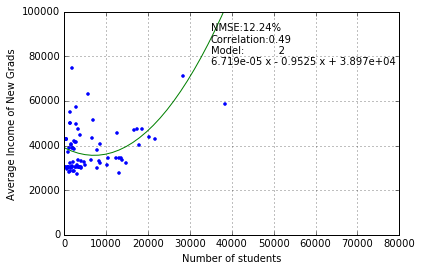

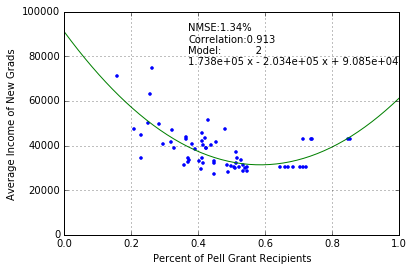

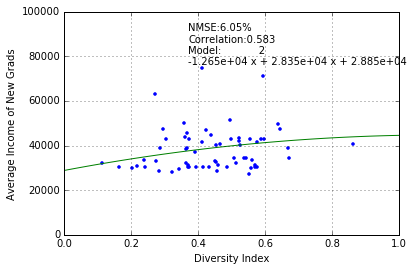


State: MN


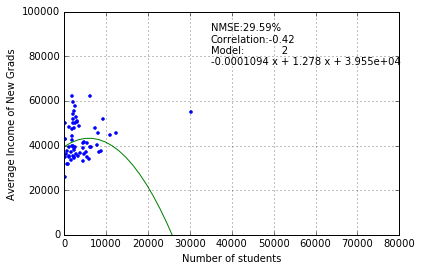

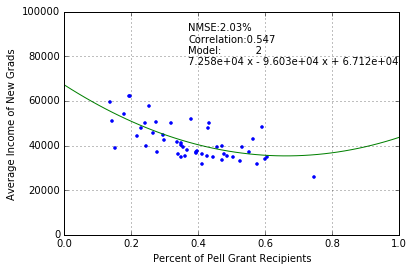

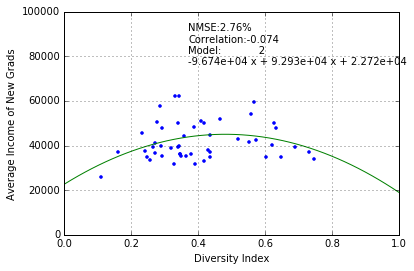


State: MO


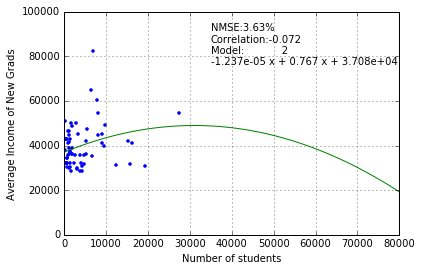

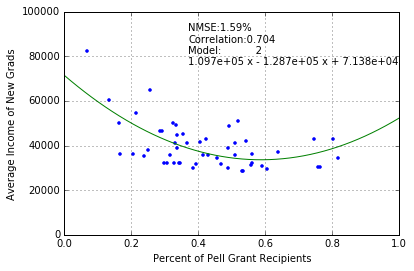

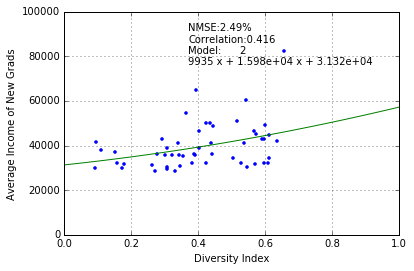


State: MS


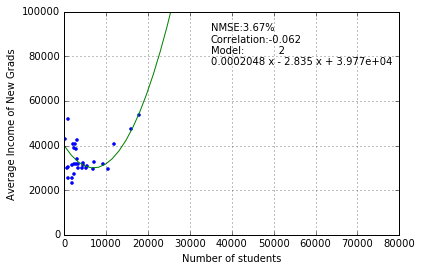

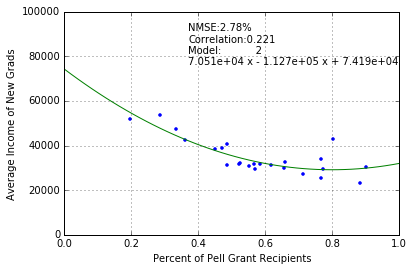

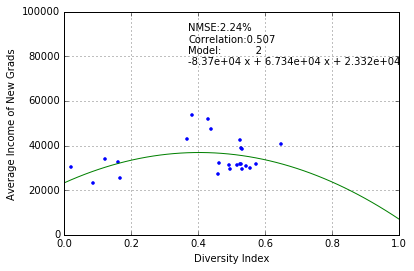


State: MT


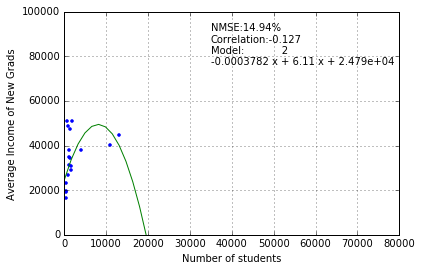

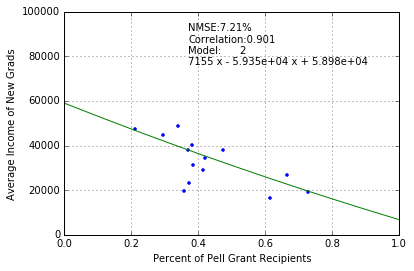

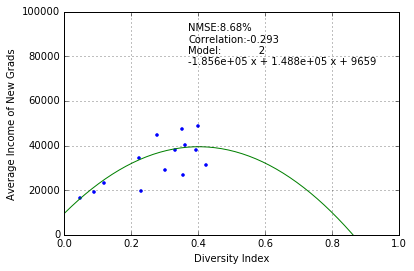


State: NC


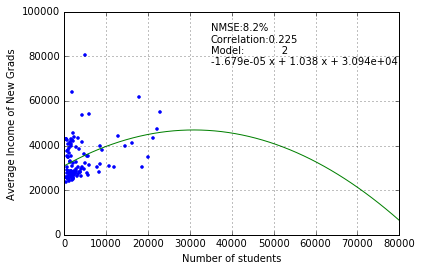

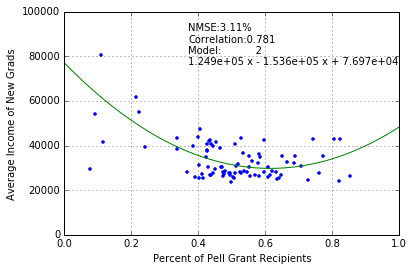

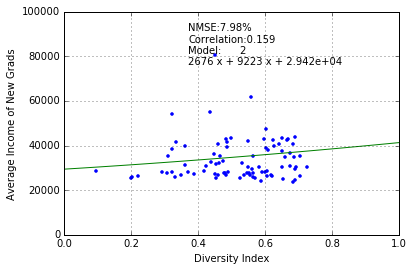


State: ND


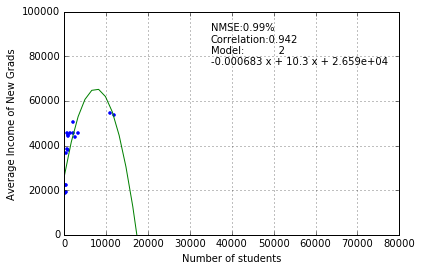

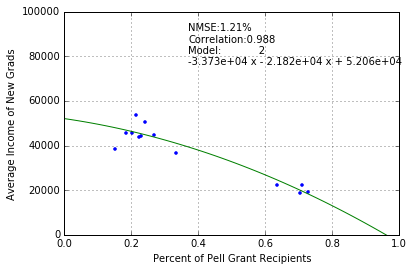

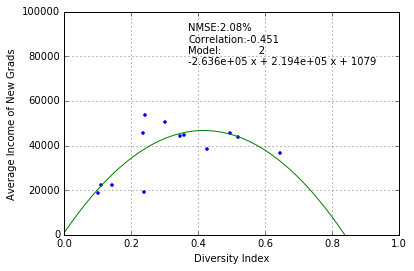


State: NE


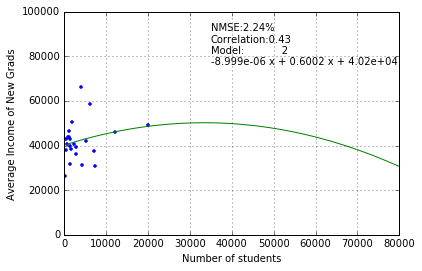

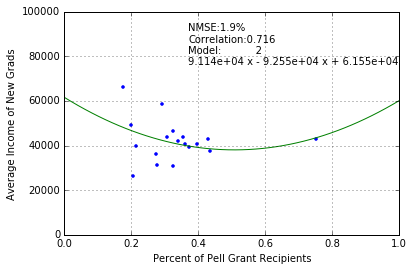

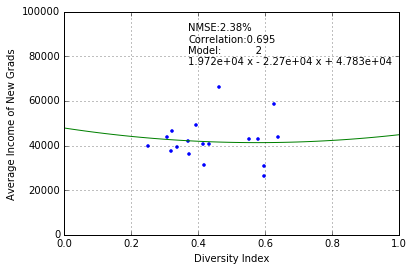


State: NJ


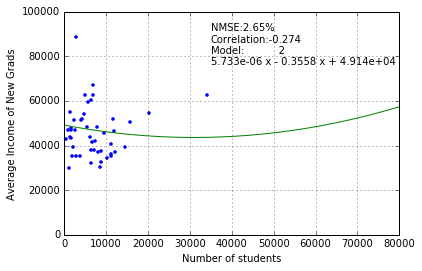

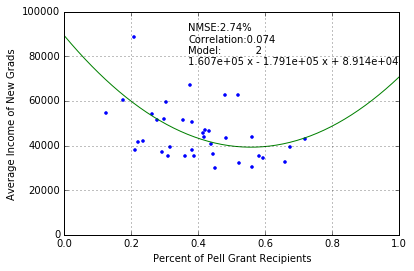

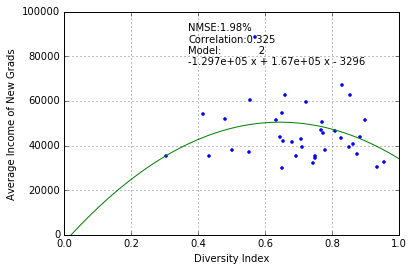


State: NM


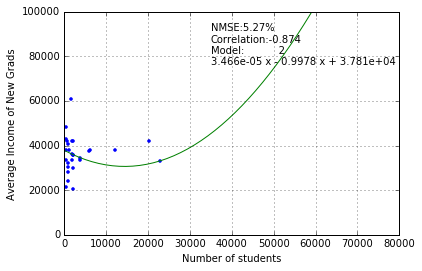

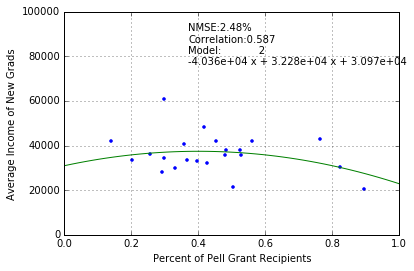

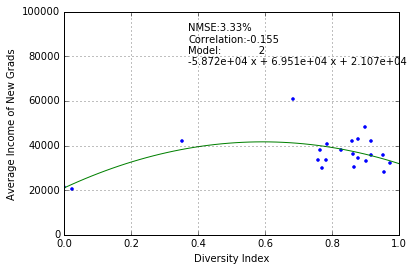


State: NY


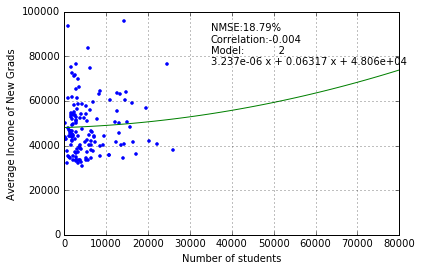

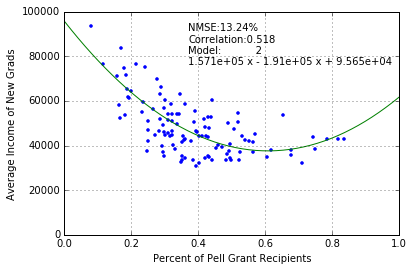

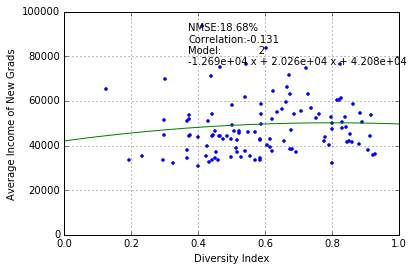


State: OH


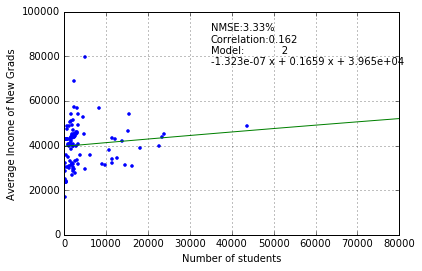

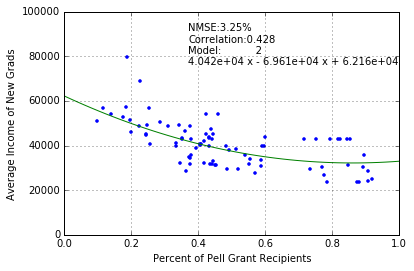

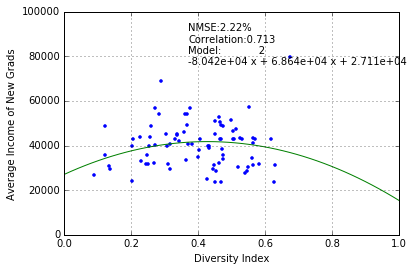


State: OK


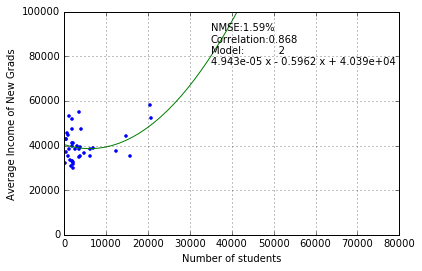

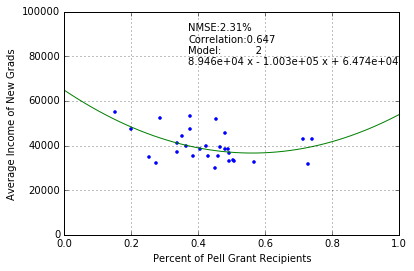

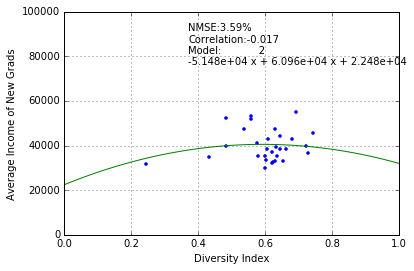


State: OR


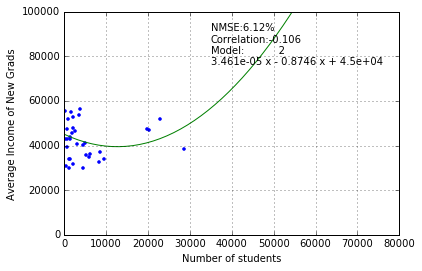

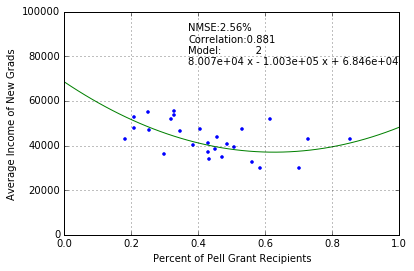

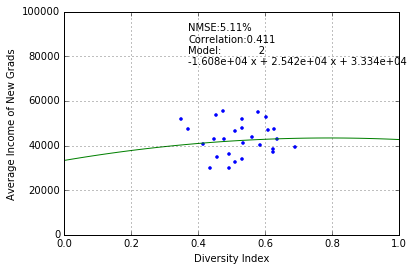


State: PA


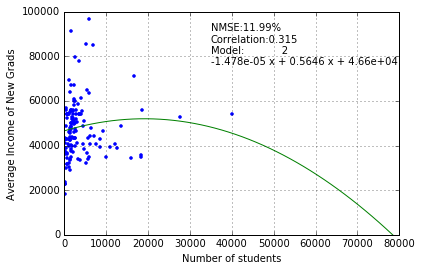

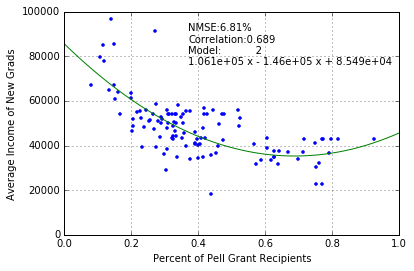

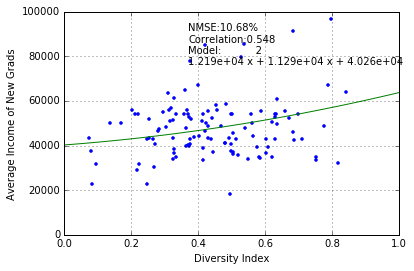


State: SC


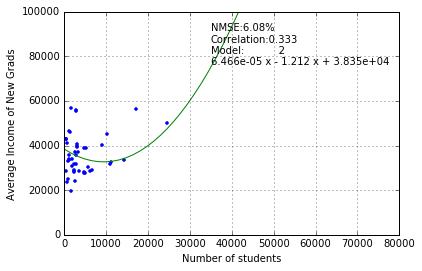

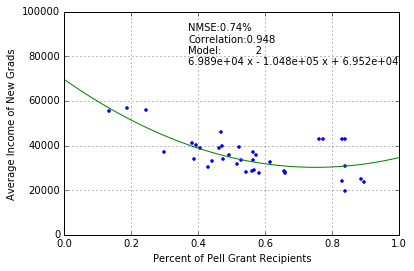

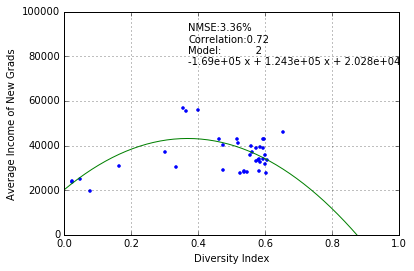


State: SD


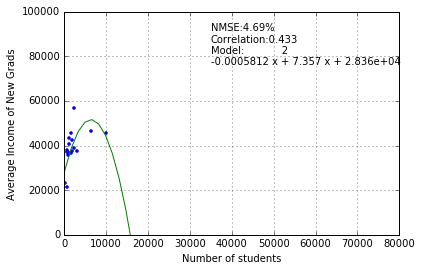

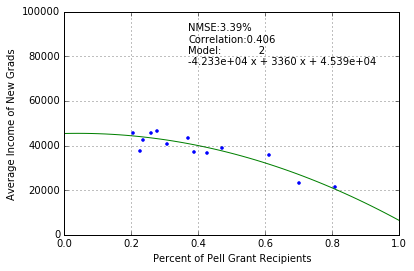

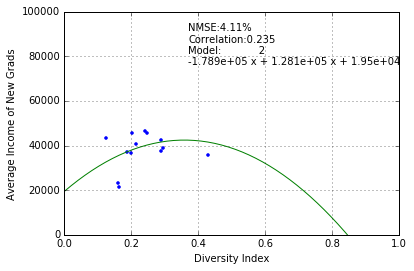


State: TN


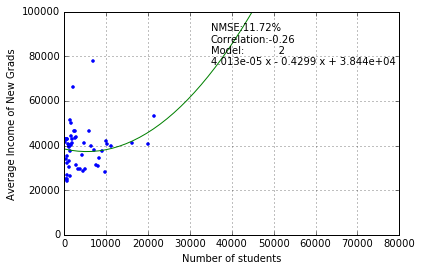

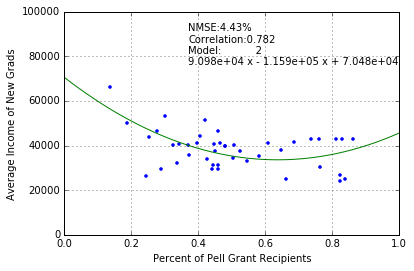

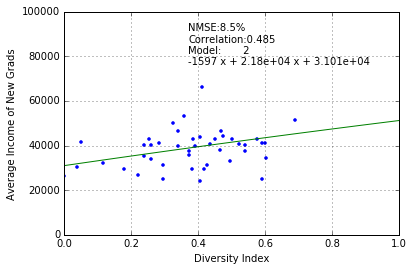


State: TX


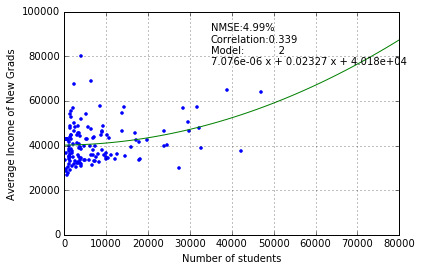

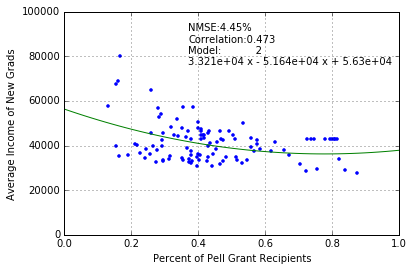

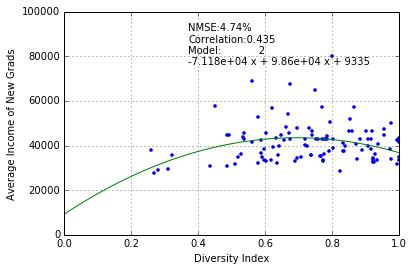


State: VA


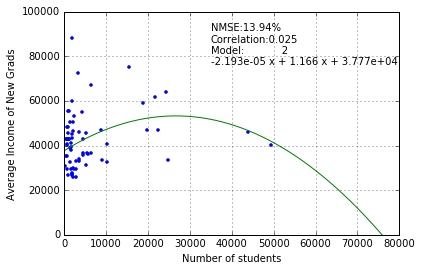

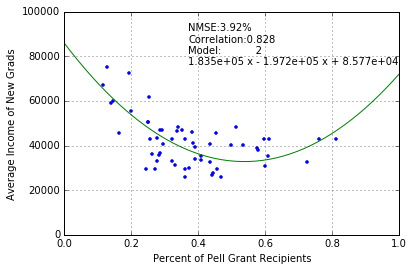

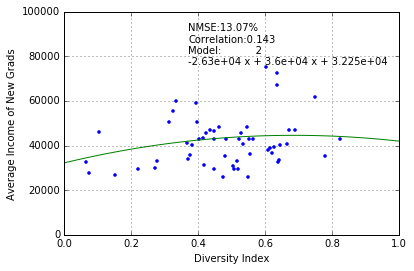


State: WA


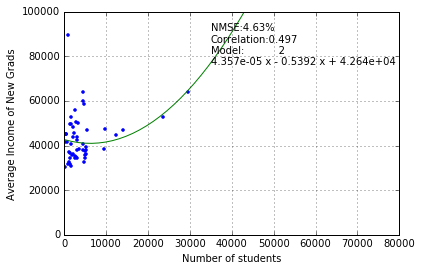

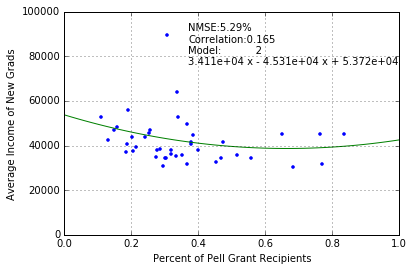

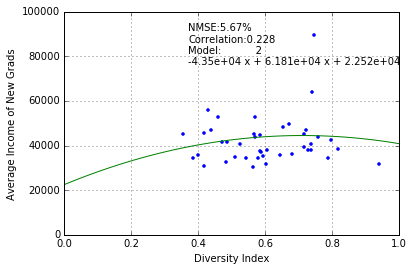


State: WI


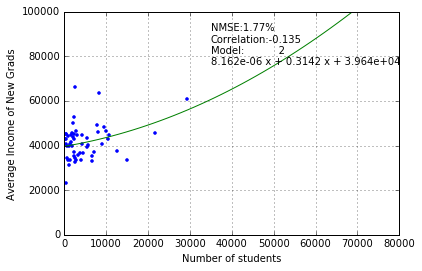

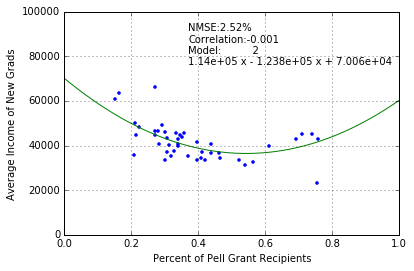

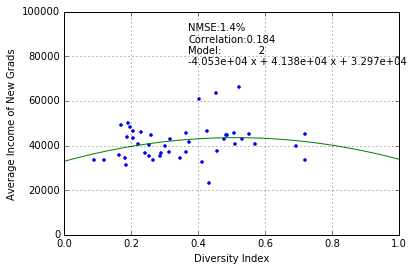


State: WV


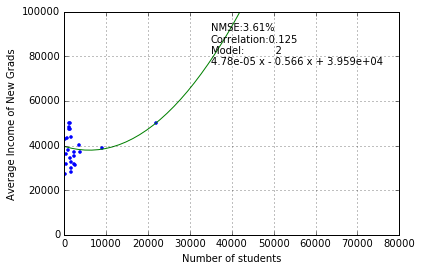

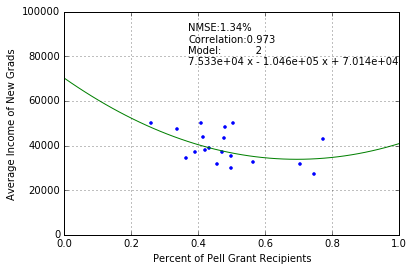

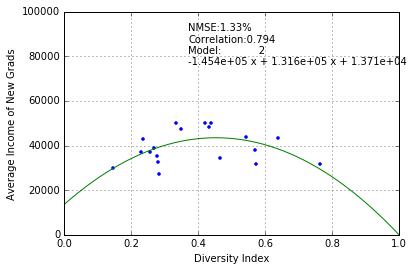

,State,School,Students,Pell,Diversity,Avg_Inc
0,AL,Alabama A & M University,4206,0.736,0.124,35000
1,AL,University of Alabama at Birmingham,11383,0.346,0.578,46300
2,AL,University of Alabama in Huntsville,5451,0.307,0.493,50400
3,AL,Alabama State University,4811,0.735,0.152,29400
4,AL,The University of Alabama,29851,0.204,0.374,48600
5,AL,Central Alabama Community College,1592,0.589,0.405,31400
6,AL,Athens State University,2991,0.409,0.372,41600
7,AL,Auburn University at Montgomery,4304,0.419,0.600,37700
8,AL,Auburn University,20514,0.161,0.271,52900
9,AL,Birmingham Southern College,1180,0.192,0.348,47100


In [61]:
#G) Iterate through information, create the following:
#     DF, Data_Frame that will contain every school and the corresponding
#     Final, List of states, that contains each the weight to each attribute of the state

Grouped = data.groupby('State')
Final = [] #List contain weights of each x attribute and intercept for every sate

DF = pd.DataFrame(columns = ['State','School','Students','Pell','Diversity','Avg_Inc'])
DFW = pd.DataFrame(columns = ['State','Incercept(W0)','Weight1','Weight2','Weight3'])

for item in Grouped: #Every state in dictionary
    
    #All of these are series with multiple rows
    WHL = item[1]['White']
    BLL = item[1]['Black']    
    ASL = item[1]['Asian']
    AIL = item[1]['Amer_Ind']  
    
    NHL = item[1]['Nat_Haw']
    MRL = item[1]['Multi']    
    UL = item[1]['Unknown']

    State = item[1]['State']
    School = item[1]['School']
    
    Number = item[1]['Number_Stud']
    Pell = item[1]['Pell_Pct']
    Inc = item[1]['Average_Earning']
    
    StateL = [] #List of tuples for the current state, used to store data in the MySQL database
    for i in range(len(WHL)):
        WP = WHL.iloc[i]
        BP = BLL.iloc[i]
        AS = ASL.iloc[i]
        AI = AIL.iloc[i]
        
        NH = NHL.iloc[i]
        MR = MRL.iloc[i]
        UP = UL.iloc[i]
        
        St = State.iloc[i]
        S = School.iloc[i]
        
        N = Number.iloc[i]
        I = Inc.iloc[i]
        
        P = float(format(Pell.iloc[i],'.3f')) 
        #Visually round values, sometimes python floats do not show as expected rounded values
        
        Div_Idx = diversity_index_calculator(WP,BP,AS,AI,NH,MR,UP)
        #Call to the function with percentages of each ethnicity for one school
        Div_Idx = float(format(Div_Idx,'.3f'))
       
        T = (St,S,N,P,Div_Idx,I)
        StateL.append(T) #Append the schools information to the state.
    

    if len(StateL) < 15: #Remove states that don't have at least 15 universities
        continue
 
    print("State:",St)
        
    eleDF = pd.DataFrame(StateL,columns = ['State','School','Students','Pell','Diversity','Avg_Inc'])
    #Create DataFrame from list of tuples (The list corresponds to a list of schools in each state)
    
    DF = DF.append(eleDF,ignore_index = True)
    #Add eleDF to DataFrame of every school
    

    #Model contains coefficients and intercept
    #Model is meant to contain the weights for each x attribute to be stored in an MySQL database to be used
    #    for analysis.
    #However we have scrapped this idea (due to time constraints and irregular error values) and instead 
    #    changed to creating regression plots in the Regression_DK() function and storing them in a folder.
    #    the stored plots are used for the website.
    Model = Regression_DK(St,eleDF) 
    
    W = [Model.intercept_]
    W.extend(Model.coef_)
    
    newW = [float(x) for x in W]
    newW = [float(format(x,'.3f')) for x in newW]
            
    W = [St]
    W.extend(newW)
    
    Final.append(W)
    #Final is used to store each model (attribute weights and intercept) into MySQL database. Idea has been scraped

DF 

In [1]:
#H) Using MySQL, connection data
import mysql.connector
from mysql.connector import errorcode

uname = "mejiarod"
pwd = "Noblesse"
hname = "mysql-user.cse.msu.edu"
db = uname

In [4]:
#I) Creating State_Data table. Although idea to use MySQL was scrapped, 
#       this table still conatians relevant information.
cnx = mysql.connector.connect(user = uname, password = pwd, host = hname, database = db)
cursor = cnx.cursor()

#Create new table
query = "DROP TABLE IF EXISTS State_Data"
cursor.execute(query)

#FOREIGN KEY (State) REFERENCES State_Weights(State),
query = """CREATE TABLE State_Data (ID INT NOT NULL AUTO_INCREMENT PRIMARY KEY, 
                                        State VARCHAR(5),
                                        FOREIGN KEY (State) REFERENCES State_Weights(State), 
                                        School VARCHAR(50), Students REAL,
                                        Pell_Pct REAL, Diversity_Idx REAL, Avg_Inc REAL
                                        );"""
cursor.execute(query)

#Insert into table
cnx = mysql.connector.connect(user = uname, password = pwd, host = hname, database = db)
cursor = cnx.cursor()

L = DF.values.tolist() #Change dataframe to list

for ele in L:
    st = ele[0]
    sc = ele[1]
    
    stud = str(ele[2])
    pell = str(ele[3])
    
    div = str(ele[4])
    avg = str(ele[5])
    
    cursor.execute("""INSERT INTO State_Data (State,School,Students,Pell_Pct,Diversity_Idx,Avg_Inc) 
                    VALUES (%s, %s, %s, %s, %s, %s);""",(st,sc,float(stud),float(pell),float(div),float(avg)))
cnx.commit()
cursor.close()
cnx.close()


In [93]:
#J) Creating State_Weights table. Although idea to use MySQL was scrapped, 
#       this table still conatians relevant information.
cnx = mysql.connector.connect(user = uname, password = pwd, host = hname, database = db)
cursor = cnx.cursor()

#Create new table
query = "DROP TABLE IF EXISTS State_Weights"
cursor.execute(query)

query = """CREATE TABLE State_Weights (State VARCHAR(5) PRIMARY KEY, 
                                        W0_Intercept REAL, W1 REAL, W2 REAL, W3 REAL);"""

cursor.execute(query)

#Insert into table
cnx = mysql.connector.connect(user = uname, password = pwd, host = hname, database = db)
cursor = cnx.cursor()

#LW = DFW.values.tolist() #Change dataframe to list

for ele in Final:
    st = ele[0]
    
    w0 = str(ele[1])
    w1 = str(ele[2])
    w2 = str(ele[3])
    w3 = str(ele[4])
    
    cursor.execute("""INSERT INTO State_Weights (State,W0_Intercept,W1, W2, W3) 
                    VALUES (%s, %s, %s, %s, %s);""",(st,float(w0),float(w1),float(w2),float(w3)))
cnx.commit()
cursor.close()
cnx.close()

In [31]:
#K) scatter plots to explore datasets
x1 = list(DF.Students)
x2 = list(DF.Pell)
x3 = list(DF.Diversity)
y = list(DF.Avg_Inc)

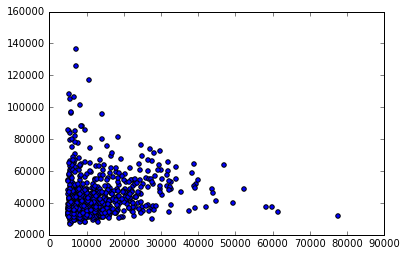

In [33]:
plt.scatter(x1,y) #Number of students vs Average Income

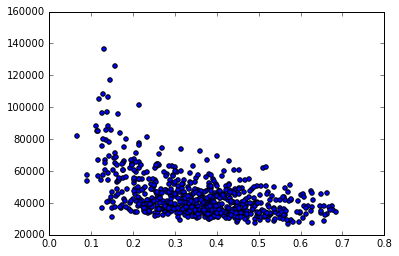

In [34]:
plt.scatter(x2,y) #Percent of school that is Pell recs. vs Average Income

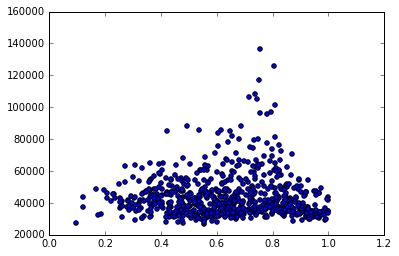

In [35]:
plt.scatter(x3,y) #Diversity Index vs Average Income